# Polynomial Regression

Author: Imran Younus

Email: izawad19@hhotmail.com

LinkedIn: https://www.linkedin.com/in/imran-younus-031283111/


In [16]:
# important libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



# Others
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split


# Load Dataset

df = pd.read_csv("Student_Grades_Dataset.csv")
print(df.head())

   Student_ID  Age  Study_Hours  Prev_Grades  Final_Grade
0           1   15          8.0         60.0         65.0
1           2   16          9.5         64.5         73.5
2           3   17         11.0         69.0         72.0
3           4   18         12.5         73.5         80.5
4           5   15         14.0         78.0         79.0


# 1 Inspect the Dataset

In [ ]:
print(df.head())
print(df.tail())

# 2 Understand the structure of dataset

In [ ]:
print(df.info())  # Column types, non-null values, and structure d
print(df.describe())  # ssummary statistics of Numerical columns

# 3 Names of columns and rows

In [9]:
#print(df.columns)
print(df.shape)

(50, 5)


# 4 Missing values

In [10]:
print(df.isnull().sum())

Student_ID     0
Age            0
Study_Hours    0
Prev_Grades    0
Final_Grade    0
dtype: int64


# 5 Unique values and duplicates

In [11]:
#print(df.nunique())
print(df.duplicated().sum())

0


# 6 Specific columns or rows

In [12]:
print(df['Age'].head()) # see the specific column
print(df.iloc[0]) # Acces the first row data

0    15
1    16
2    17
3    18
4    15
Name: Age, dtype: int64
Student_ID      1.0
Age            15.0
Study_Hours     8.0
Prev_Grades    60.0
Final_Grade    65.0
Name: 0, dtype: float64


# 7 Define Independent and Dependent Variables

In [13]:
# Independent variables (X)
X = df[["Age", "Study_Hours", "Prev_Grades"]]  # Input columns

# Dependent variable (y)
y = df["Final_Grade"]  # Output column

print(X.head())
print(y.head())

   Age  Study_Hours  Prev_Grades
0   15          8.0         60.0
1   16          9.5         64.5
2   17         11.0         69.0
3   18         12.5         73.5
4   15         14.0         78.0
0    65.0
1    73.5
2    72.0
3    80.5
4    79.0
Name: Final_Grade, dtype: float64


# 8A Automatic Selection of Input and Output Columns

In [15]:
# All columns except the last one as inputs (X)
X = df.iloc[:, :-1]
print(X.head())



   Student_ID  Age  Study_Hours  Prev_Grades
0           1   15          8.0         60.0
1           2   16          9.5         64.5
2           3   17         11.0         69.0
3           4   18         12.5         73.5
4           5   15         14.0         78.0


# 8B

In [17]:
# Last column as output (y)
y = df.iloc[:, -1]
print(y.head())

0    65.0
1    73.5
2    72.0
3    80.5
4    79.0
Name: Final_Grade, dtype: float64


# 9 Visualization Data

Study Hours and Final Grade of relation  is linear or non-linear? 

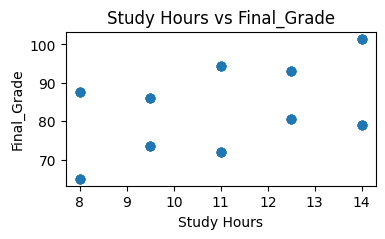

In [18]:



# Scatter plot: Study Hours vs Final Grade
plt.figure(figsize=(4, 2))
plt.scatter(df['Study_Hours'],df['Final_Grade'])
plt.title('Study Hours vs Final_Grade')
plt.xlabel('Study Hours')
plt.ylabel('Final_Grade')
plt.show()

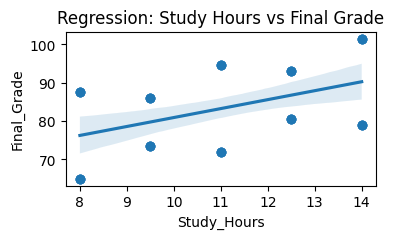

In [19]:
import seaborn as sns
# Regression plot between Study Hours and Final Grade
plt.figure(figsize=(4, 2))
sns.regplot(x='Study_Hours', y='Final_Grade', data=df)
plt.title('Regression: Study Hours vs Final Grade')
plt.show()

# 10 Model Traning

In [20]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=42)

# Print the training and testing data

#print("Training Inputs (X_train):\n", X_train.head())
#print("Testing Inputs (y_train):\n", y_train.head())

#print("Training Outputs (X_test):\n", X_test)
#print("Testing Outputs (y_test):\n", y_test)


#print("Training Input Shape:", X_train.shape)
#print("Testing Input Shape:",  y_train.shape)
#print("Training Output Shape:", X_test.shape)
#print("Testing Output Shape:", y_test.shape)

print("Training Data Indices:", X_train.index)
print("Testing Data Indices:", X_test.index)

Training Data Indices: Int64Index([48, 26, 25, 32, 19, 12,  4, 37,  8,  3,  6, 41, 46, 47, 15,  9, 16,
            24, 34, 31,  0, 44, 27, 33,  5, 29, 11, 36,  1, 21,  2, 43, 35, 23,
            40, 10, 22, 18, 49, 20,  7, 42, 14, 28, 38],
           dtype='int64')
Testing Data Indices: Int64Index([13, 39, 30, 45, 17], dtype='int64')


# 11 Create Polynomial Features (degree 2 or higher)

In [21]:
poly = PolynomialFeatures(degree=2)  # You can try degree=3 or more

X_train_poly = poly.fit_transform(X_train)
#X_train_poly

X_test_poly = poly.transform(X_test)
X_test_poly

array([[1.000000e+00, 1.400000e+01, 1.600000e+01, 1.250000e+01,
        7.350000e+01, 1.960000e+02, 2.240000e+02, 1.750000e+02,
        1.029000e+03, 2.560000e+02, 2.000000e+02, 1.176000e+03,
        1.562500e+02, 9.187500e+02, 5.402250e+03],
       [1.000000e+00, 4.000000e+01, 1.800000e+01, 1.400000e+01,
        1.005000e+02, 1.600000e+03, 7.200000e+02, 5.600000e+02,
        4.020000e+03, 3.240000e+02, 2.520000e+02, 1.809000e+03,
        1.960000e+02, 1.407000e+03, 1.010025e+04],
       [1.000000e+00, 3.100000e+01, 1.700000e+01, 8.000000e+00,
        6.000000e+01, 9.610000e+02, 5.270000e+02, 2.480000e+02,
        1.860000e+03, 2.890000e+02, 1.360000e+02, 1.020000e+03,
        6.400000e+01, 4.800000e+02, 3.600000e+03],
       [1.000000e+00, 4.600000e+01, 1.600000e+01, 8.000000e+00,
        8.250000e+01, 2.116000e+03, 7.360000e+02, 3.680000e+02,
        3.795000e+03, 2.560000e+02, 1.280000e+02, 1.320000e+03,
        6.400000e+01, 6.600000e+02, 6.806250e+03],
       [1.000000e+00, 1.8000

# 12 Train the Polynomial Regression model

In [22]:
lrg = LinearRegression()
lrg.fit(X_train_poly, y_train)

LinearRegression()

# 13 Make predictions

In [23]:
y_pred = lrg.predict(X_test_poly)
print(y_pred)

[ 76.16566027 101.39178643  68.85926016  84.35024307  91.17504739]


# 14 Compersion side by side

In [24]:
print(y_test)

13     80.5
39    101.5
30     65.0
45     87.5
17     94.5
Name: Final_Grade, dtype: float64


# 15 Accuracy score

In [25]:
from sklearn.metrics import r2_score, mean_squared_error

# R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

R-squared: 0.9304296529601587
Mean Squared Error: 10.933675740781464
Root Mean Squared Error: 3.3066109146347205


# 16 Visualize the results (Training Data)

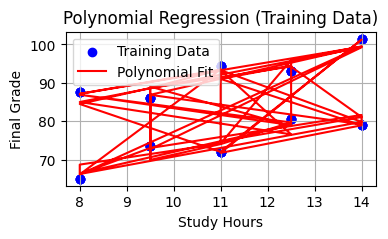

In [26]:
plt.figure(figsize=(4, 2))
#plt.scatter(X_train, y_train, color='blue', label='Training Data') # This line caused the error due to shape mismatch
plt.scatter(X_train['Study_Hours'], y_train, color='blue', label='Training Data')  # Use a single feature 'Study_Hours' for x-axis
plt.plot(X_train['Study_Hours'], lrg.predict(X_train_poly), color='red', label='Polynomial Fit') # plot against the same feature for consistency
plt.title("Polynomial Regression (Training Data)")
plt.xlabel("Study Hours")
plt.ylabel("Final Grade")
plt.legend()
plt.grid(True)
plt.show()

 # 17 Visualize the results (Test Data)

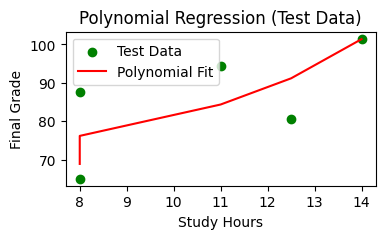

In [27]:
plt.figure(figsize=(4, 2))
# Select a single feature for the x-axis, e.g., 'Study_Hours'
plt.scatter(X_test['Study_Hours'], y_test, color='green', label='Test Data')
plt.plot(sorted(X_test['Study_Hours']),
         sorted(lrg.predict(X_test_poly)),
         color='red', label='Polynomial Fit')
plt.title("Polynomial Regression (Test Data)")
plt.xlabel("Study Hours")
plt.ylabel("Final Grade")
plt.legend()
plt.show()